This notebook demonstrates how to use the `mask` option of cv2.matchTemplate with MTM.  
The mask is used in combination with the template (it has the same dimensions) to __limit the comparison of the pixel values to only some specific region of the template__. This allows to overcome the default square shape of the template.  

__N:B__: This option in MTM is __only supported with the method 3/TM_CCORR_NORMED__ (because in opencv it is supported only for method 0/TM_SQ_DIFF and 3, but method 0 is not supported by MTM). 

Here it is illustrated with the coin image. Actually the result with mask than without !  
This is because in this particular case, the background around the coins was also matching well.  
In other cases, the background might not match well and so using the mask can help.

In [1]:
# Set the root of the repo as the working directory, when running the notebook locally to load the package locally too
# Not needed if the package was installed with pip
%cd ..

C:\Users\Laurent Thomas\Documents\repo-MTM-Python


In [ ]:
# Install matplotlib if not already installed
# it is used in this notebook, but is otherwise not an actual dependency of MTM
%pip install matplotlib

In [1]:
import matplotlib.pyplot as plt
import cv2, MTM
print(MTM.__version__)

2.0.0


In [2]:
from skimage.data import coins
image     = coins()
template = image[37:37+38, 80:80+41]

# Threshold the template
The result is not perfect but it does not matter if a few pixels are missing.  
The pixel in dark blue (equal to 0) will not be used for the pixel value comparison, only the yellow area.   
A fillHoles would be great, but it does not exist in OpenCV (dilate+erode instead ?)

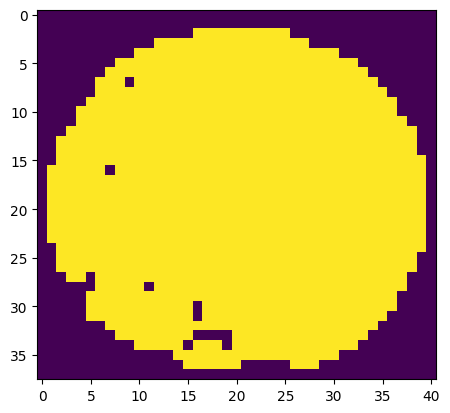

In [3]:
# threshold
theshold, mask = cv2.threshold(template,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(mask)

# Usual call without mask

In [4]:
listTemplates = [ ("testMask", template) ]
listHits = MTM.matchTemplates(listTemplates, 
                          image, 
                          method=cv2.TM_CCORR_NORMED, 
                          score_threshold=0.8,
                          maxOverlap=0)
listHits

[('testMask', (80, 37, 41, 38), 1.0000002),
 ('testMask', (82, 106, 41, 38), 0.9777622),
 ('testMask', (22, 37, 41, 38), 0.9775883),
 ('testMask', (133, 108, 41, 38), 0.97702277),
 ('testMask', (23, 178, 41, 38), 0.97312117),
 ('testMask', (341, 247, 41, 38), 0.9723443),
 ('testMask', (134, 36, 41, 38), 0.97204673),
 ('testMask', (26, 103, 41, 38), 0.9717183),
 ('testMask', (257, 33, 41, 38), 0.9712),
 ('testMask', (199, 33, 41, 38), 0.97099215),
 ('testMask', (336, 158, 41, 38), 0.96930236),
 ('testMask', (134, 178, 41, 38), 0.967385),
 ('testMask', (283, 247, 41, 38), 0.96563774),
 ('testMask', (229, 242, 41, 38), 0.9653908),
 ('testMask', (185, 104, 41, 38), 0.9650693),
 ('testMask', (251, 106, 41, 38), 0.9625988),
 ('testMask', (316, 105, 41, 38), 0.96015817),
 ('testMask', (157, 236, 41, 38), 0.95904356),
 ('testMask', (29, 231, 41, 38), 0.9586952),
 ('testMask', (315, 13, 41, 38), 0.95846957),
 ('testMask', (91, 246, 41, 38), 0.9571323),
 ('testMask', (82, 180, 41, 38), 0.9539777

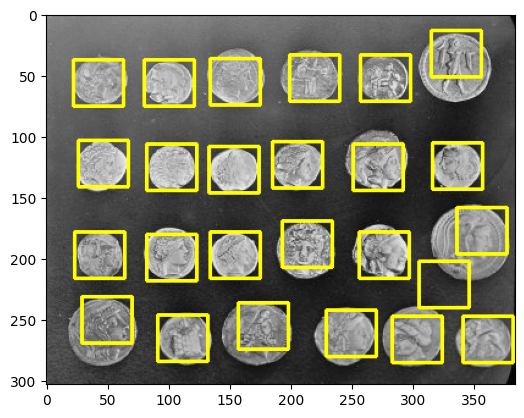

In [5]:
Overlay = MTM.drawBoxesOnRGB(image, listHits)
plt.imshow(Overlay)

# Test with mask
The syntax of the call is the same except that the tuple for each template can now have a third element which should be the numpy array for the mask.  
It should have the same dimensions than the template.  
Pixel with values equal to 0 in the mask will not be used for the pixel values comparison.

In [6]:
listTemplates = [ ("testMask", template, mask) ]
listHits = MTM.matchTemplates(listTemplates, 
                              image, 
                              method=cv2.TM_CCORR_NORMED, 
                              score_threshold=0.8, 
                              maxOverlap=0)
listHits

[('testMask', (80, 37, 41, 38), 1.0),
 ('testMask', (5, 70, 41, 38), 0.99374694),
 ('testMask', (0, 2, 41, 38), 0.9936011),
 ('testMask', (41, 141, 41, 38), 0.99231666),
 ('testMask', (137, 28, 41, 38), 0.991843),
 ('testMask', (230, 0, 41, 38), 0.99184036),
 ('testMask', (211, 69, 41, 38), 0.9910499),
 ('testMask', (158, 141, 41, 38), 0.9904751),
 ('testMask', (102, 137, 41, 38), 0.9896537),
 ('testMask', (334, 159, 41, 38), 0.98959434),
 ('testMask', (157, 67, 41, 38), 0.9886728),
 ('testMask', (335, 248, 41, 38), 0.9880982),
 ('testMask', (225, 239, 41, 38), 0.9880205),
 ('testMask', (280, 139, 41, 38), 0.9877867),
 ('testMask', (274, 0, 41, 38), 0.9876592),
 ('testMask', (213, 130, 41, 38), 0.9875014),
 ('testMask', (82, 177, 41, 38), 0.9870325),
 ('testMask', (285, 246, 41, 38), 0.98693585),
 ('testMask', (289, 201, 41, 38), 0.9841472),
 ('testMask', (21, 246, 41, 38), 0.98321056),
 ('testMask', (95, 245, 41, 38), 0.9819636),
 ('testMask', (159, 236, 41, 38), 0.98101896),
 ('testM

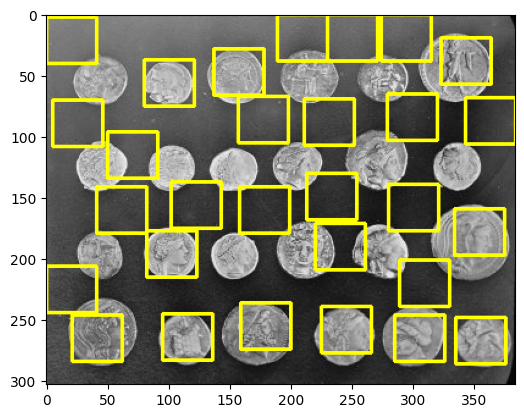

In [7]:
Overlay = MTM.drawBoxesOnRGB(image, listHits)
plt.imshow(Overlay)

As you can see, using a mask is not always beneficial, as the background surrounding the object can help increasing the matching score.